# Human dataset evaluation

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from som import KohonenNetwork, GaussianNeighboringFunc
import pickle

from sklearn.metrics import confusion_matrix, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import seaborn as sns

## Cluster evaluation

In [3]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

def cross_val_kmeans(X, y, cv=5, M=10, N=10, mapping=True, grid = "rectangular", verbose=False, idx_path = None, save_path=None):
    # train test split
    idx = np.load(idx_path)
    
    scores = { 'homogeneity': [], 'completeness': [], 'v_measure': []}
    for i in range(cv):
        print(f"Fold {i+1}/{cv}")
        # train test split
        if mapping:
            with open(f"{save_path}_{i}.pkl", 'rb') as f:
                koh = pickle.load(f)
                
            embedding = koh.get_mapping(X)
        else:
            embedding = X
             

        X_train = embedding[idx != i]
        y_train = y[idx != i]
        X_test = embedding[idx == i]
        y_test = y[idx == i]
        
        kmeans = KMeans(n_clusters=np.unique(y).shape[0])
        kmeans.fit(X_train)
        
        y_pred = kmeans.predict(X_test)
        
        scores['homogeneity'].append(homogeneity_score(y_test, y_pred))
        scores['completeness'].append(completeness_score(y_test, y_pred))
        scores['v_measure'].append(v_measure_score(y_test, y_pred))
    
    return scores

# Human activity

In [4]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

In [5]:
train = pd.read_table('data/human_train.txt', header=None, delim_whitespace=True)
test = pd.read_table('data/human_test.txt', header=None, delim_whitespace=True)

C:\Users\tymot\AppData\Local\Temp\ipykernel_39096\3985905118.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train = pd.read_table('data/human_train.txt', header=None, delim_whitespace=True)
C:\Users\tymot\AppData\Local\Temp\ipykernel_39096\3985905118.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test = pd.read_table('data/human_test.txt', header=None, delim_whitespace=True)


In [6]:
y_train = pd.read_table('data/human_train_target.txt', header=None, delim_whitespace=True)
y_test = pd.read_table('data/human_test_target.txt', header=None, delim_whitespace=True)

C:\Users\tymot\AppData\Local\Temp\ipykernel_39096\941066895.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_table('data/human_train_target.txt', header=None, delim_whitespace=True)
C:\Users\tymot\AppData\Local\Temp\ipykernel_39096\941066895.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_test = pd.read_table('data/human_test_target.txt', header=None, delim_whitespace=True)


In [7]:

X = np.concatenate([train.values, test.values])

y = np.concatenate([y_train.values, y_test.values]).ravel()

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


Text(0.5, 0.98, 'KMeans clustering on human dataset')

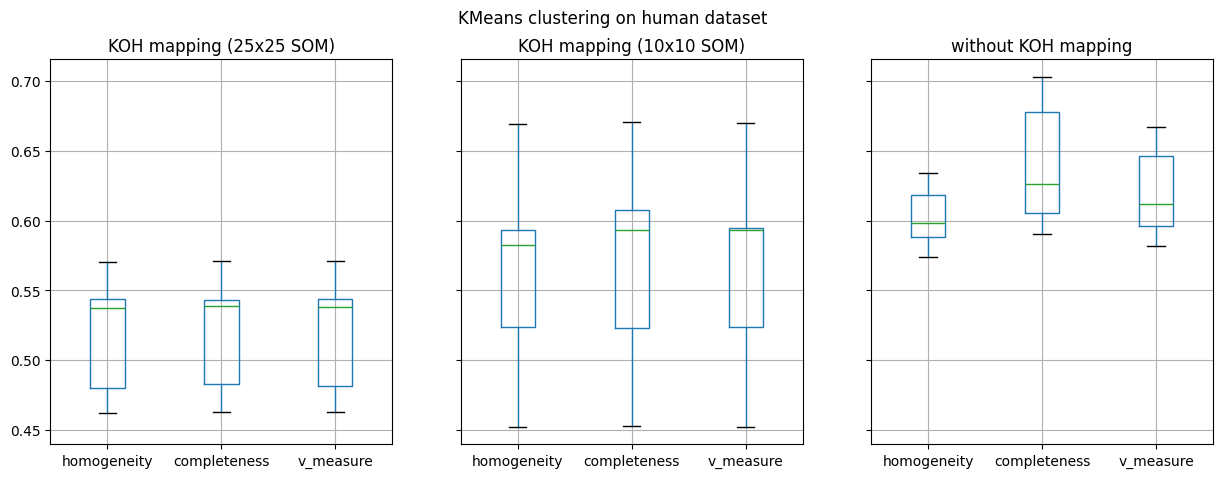

In [74]:

fig , ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

scores = cross_val_kmeans(X, y, cv=5, idx_path='som_snapshots/net25x25/human_som_rect_idx.npy', save_path='som_snapshots/net25x25/human_som')

scores = pd.DataFrame(scores)
scores.boxplot(ax=ax[0])
ax[0].set_title('KOH mapping (25x25 SOM)')


scores = cross_val_kmeans(X, y, cv=5, idx_path='som_snapshots/net10x10/human_som_rect_idx.npy', save_path='som_snapshots/net10x10/human_som')


scores = pd.DataFrame(scores)
scores.boxplot(ax=ax[1])
ax[1].set_title('KOH mapping (10x10 SOM)')



scores = cross_val_kmeans(X, y, cv=5, idx_path='som_snapshots/net10x10/human_som_rect_idx.npy', save_path='som_snapshots/net10x10/human_som', mapping=False)
scores = pd.DataFrame(scores)

ax[2].set_title('without KOH mapping')

scores.boxplot(ax=ax[2])

fig.suptitle("KMeans clustering on human dataset")

In [8]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

def cross_val_rf(X, y, cv=5, M=10, N=10, mapping=True, grid = "rectangular", verbose=False, idx_path = None, save_path=None):
    # train test split
    idx = np.load(idx_path)
    
    scores = { 'accuracy': []}
    for i in range(cv):
        print(f"Fold {i+1}/{cv}")
        # train test split
        if mapping:
            with open(f"{save_path}_{i}.pkl", 'rb') as f:
                koh = pickle.load(f)
                
            embedding = koh.get_mapping(X)
        else:
            embedding = X
             

        X_train = embedding[idx != i]
        y_train = y[idx != i]
        X_test = embedding[idx == i]
        y_test = y[idx == i]
        
        rf = RandomForestClassifier()
        rf.fit(X_train, y_train.ravel())
        
        scores['accuracy'].append(rf.score(X_test, y_test))
    
    return scores

In [83]:


scores_25 = cross_val_rf(X, y, cv=5, idx_path='som_snapshots/net25x25/human_som_rect_idx.npy', save_path='som_snapshots/net25x25/human_som')


scores_10 = cross_val_rf(X, y, cv=5, idx_path='som_snapshots/net10x10/human_som_rect_idx.npy', save_path='som_snapshots/net10x10/human_som')

scores_none = cross_val_rf(X, y, cv=5, idx_path='som_snapshots/net10x10/human_som_rect_idx.npy', save_path='som_snapshots/net10x10/human_som', mapping=False)

scores_25 = pd.DataFrame(scores_25)
scores_10 = pd.DataFrame(scores_10)
scores_none = pd.DataFrame(scores_none)

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


In [84]:
scores_10

,accuracy
0,0.839320
1,0.795146
2,0.810680
3,0.827184
4,0.842642


Text(0.5, 1.0, 'Random Forest on human dataset with and without KOH mapping')

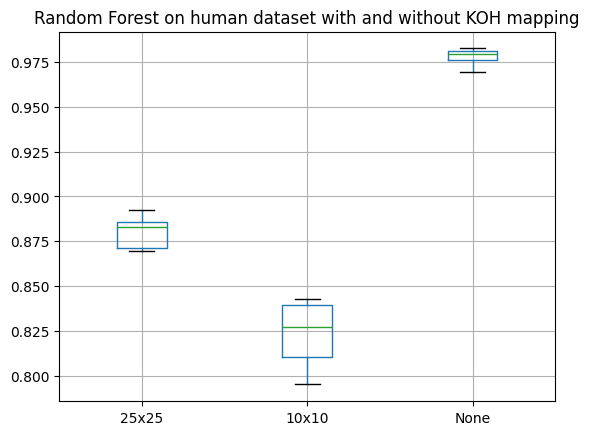

In [86]:
scores = pd.concat([scores_25, scores_10, scores_none], axis=1)
scores.columns = ['25x25', '10x10', 'None']
scores.boxplot()
plt.title("Random Forest on human dataset with and without KOH mapping")

# Different neighbouring func

Fold 1/5


c:\Users\tymot\studia\miowad\KOH\.venv\Lib\site-packages\numpy\linalg\linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


Fold 2/5


c:\Users\tymot\studia\miowad\KOH\.venv\Lib\site-packages\numpy\linalg\linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


Fold 3/5


c:\Users\tymot\studia\miowad\KOH\.venv\Lib\site-packages\numpy\linalg\linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


Fold 4/5


c:\Users\tymot\studia\miowad\KOH\.venv\Lib\site-packages\numpy\linalg\linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


Fold 5/5


c:\Users\tymot\studia\miowad\KOH\.venv\Lib\site-packages\numpy\linalg\linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


Text(0.5, 0.98, 'KMeans clustering on human dataset')

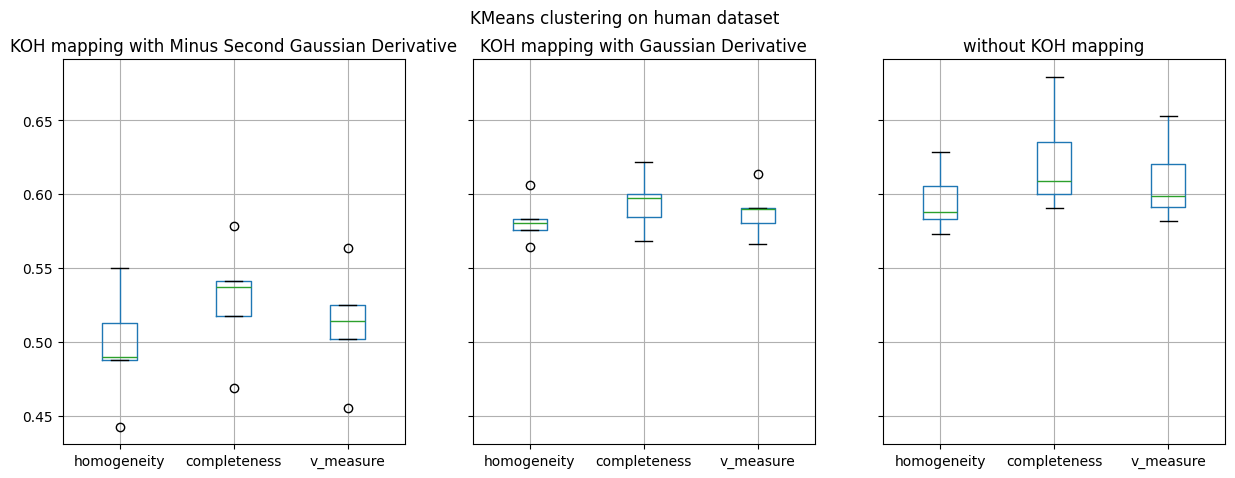

In [94]:

fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

scores = cross_val_kmeans(X, y, cv=5, idx_path='som_snapshots/net10x10/human_som_minusone_rect_idx.npy', save_path='som_snapshots/net10x10/human_som_minusone')

scores = pd.DataFrame(scores)
scores.boxplot(ax=ax[0])
ax[0].set_title('KOH mapping with Minus Second Gaussian Derivative')


scores = cross_val_kmeans(X, y, cv=5, idx_path='som_snapshots/net10x10/human_som_rect_idx.npy', save_path='som_snapshots/net10x10/human_som')


scores = pd.DataFrame(scores)
scores.boxplot(ax=ax[1])
ax[1].set_title('KOH mapping with Gaussian Derivative')



scores = cross_val_kmeans(X, y, cv=5, idx_path='som_snapshots/net10x10/human_som_rect_idx.npy', save_path='som_snapshots/net10x10/human_som', mapping=False)
scores = pd.DataFrame(scores)

ax[2].set_title('without KOH mapping')

scores.boxplot(ax=ax[2])

fig.suptitle("KMeans clustering on human dataset")

In [14]:
scores_minus = cross_val_rf(X, y, cv=5, idx_path='som_snapshots/net10x10/human_som_minusone_rect_idx.npy', save_path='som_snapshots/net10x10/human_som_minusone')

scores_minus = pd.DataFrame(scores_minus)


scores_gauss = cross_val_rf(X, y, cv=5, idx_path='som_snapshots/net10x10/human_som_rect_idx.npy', save_path='som_snapshots/net10x10/human_som')


scores_gauss = pd.DataFrame(scores_gauss)

scores = cross_val_rf(X, y, cv=5, idx_path='som_snapshots/net10x10/human_som_rect_idx.npy', save_path='som_snapshots/net10x10/human_som', mapping=False)
scores = pd.DataFrame(scores)

scores = pd.concat([scores_minus, scores_gauss, scores], axis=1)
scores.columns = ['Minus Second Gaussian Derivative', 'Gaussian Derivative', 'None']


Fold 1/5


c:\Users\tymot\studia\miowad2\miowad\KOH\.venv\Lib\site-packages\numpy\linalg\linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


Fold 2/5


c:\Users\tymot\studia\miowad2\miowad\KOH\.venv\Lib\site-packages\numpy\linalg\linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


Fold 3/5


c:\Users\tymot\studia\miowad2\miowad\KOH\.venv\Lib\site-packages\numpy\linalg\linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


Fold 4/5


c:\Users\tymot\studia\miowad2\miowad\KOH\.venv\Lib\site-packages\numpy\linalg\linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


Fold 5/5


c:\Users\tymot\studia\miowad2\miowad\KOH\.venv\Lib\site-packages\numpy\linalg\linalg.py:2582: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


Text(0, 0.5, 'Accuracy')

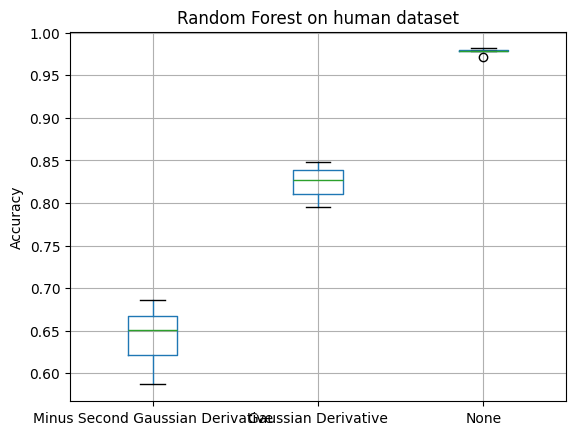

In [15]:
scores.boxplot()
plt.title("Random Forest on human dataset")
plt.ylabel("Accuracy")

## Different grids

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


Text(0.5, 0.98, 'KMeans clustering on human dataset with different grid shapes')

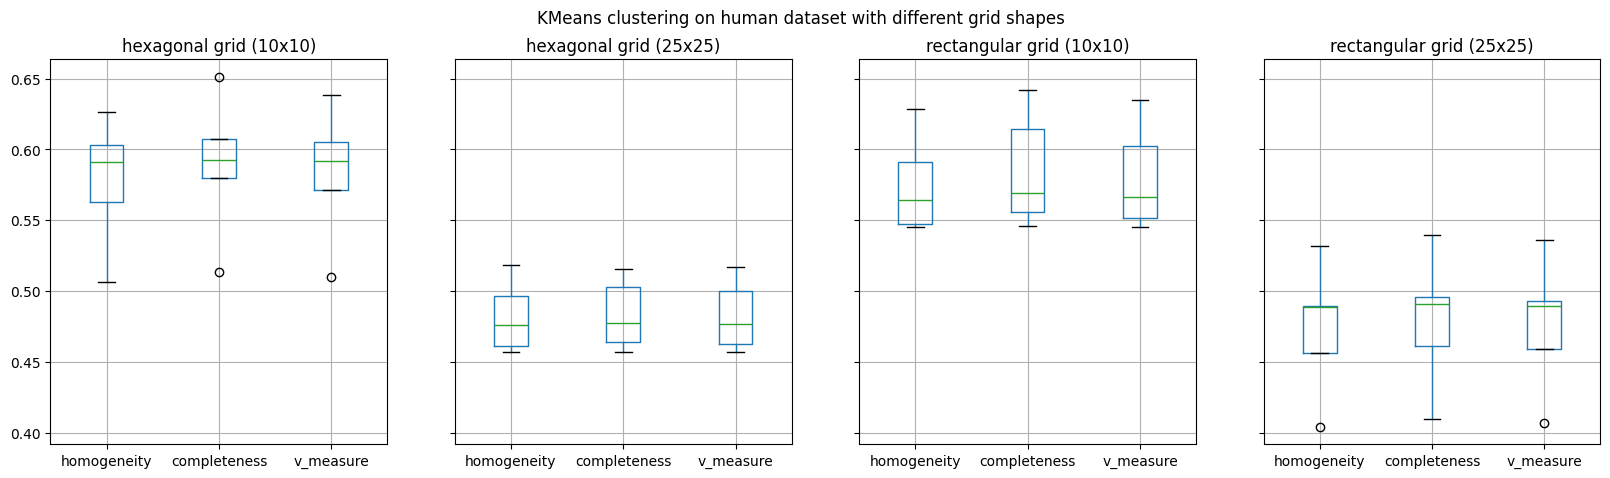

In [13]:

fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

scores_10 = cross_val_kmeans(X, y, cv=5, idx_path='som_snapshots/net10x10/human_som_hex_idx.npy', save_path='som_snapshots/net10x10/hex/human_som')

scores_10 = pd.DataFrame(scores_10)
scores_10.boxplot(ax=ax[0])
ax[0].set_title('hexagonal grid (10x10)')


scores = cross_val_kmeans(X, y, cv=5, idx_path='som_snapshots/net25x25/human_som_hex_idx.npy', save_path='som_snapshots/net25x25/hex/human_som')


scores = pd.DataFrame(scores)
scores.boxplot(ax=ax[1])
ax[1].set_title('hexagonal grid (25x25)')



scores = cross_val_kmeans(X, y, cv=5, idx_path='som_snapshots/net10x10/human_som_rect_idx.npy', save_path='som_snapshots/net10x10/human_som')
scores = pd.DataFrame(scores)

ax[2].set_title('rectangular grid (10x10)')

scores.boxplot(ax=ax[2])


scores = cross_val_kmeans(X, y, cv=5, idx_path='som_snapshots/net25x25/human_som_rect_idx.npy', save_path='som_snapshots/net25x25/human_som')
scores = pd.DataFrame(scores)

ax[3].set_title('rectangular grid (25x25)')

scores.boxplot(ax=ax[3])

fig.suptitle("KMeans clustering on human dataset with different grid shapes")

Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


<Axes: >

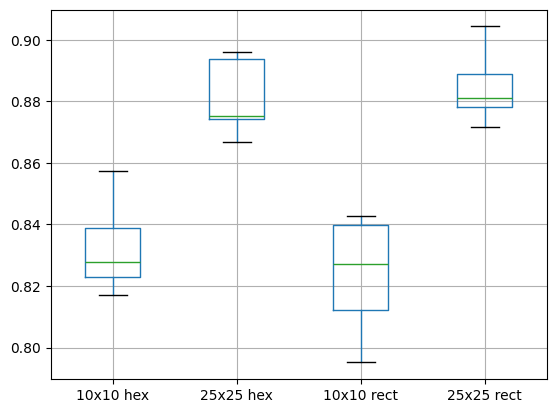

In [10]:

scores_10 = cross_val_rf(X, y, cv=5, idx_path='som_snapshots/net10x10/human_som_hex_idx.npy', save_path='som_snapshots/net10x10/hex/human_som')

scores_10 = pd.DataFrame(scores_10)


scores_25 = cross_val_rf(X, y, cv=5, idx_path='som_snapshots/net25x25/human_som_hex_idx.npy', save_path='som_snapshots/net25x25/human_som')

scores_25 = pd.DataFrame(scores_25)



scores_rect_10 = cross_val_rf(X, y, cv=5, idx_path='som_snapshots/net10x10/human_som_rect_idx.npy', save_path='som_snapshots/net10x10/human_som')
scores_rect_10 = pd.DataFrame(scores_rect_10)


scores_rect_25 = cross_val_rf(X, y, cv=5, idx_path='som_snapshots/net25x25/human_som_rect_idx.npy', save_path='som_snapshots/net25x25/human_som')
scores_rect_25 = pd.DataFrame(scores_rect_25)

scores = pd.concat([scores_10, scores_25, scores_rect_10, scores_rect_25], axis=1)
scores.columns = ['10x10 hex', '25x25 hex', '10x10 rect', '25x25 rect']
scores.boxplot()

Text(0, 0.5, 'Accuracy')

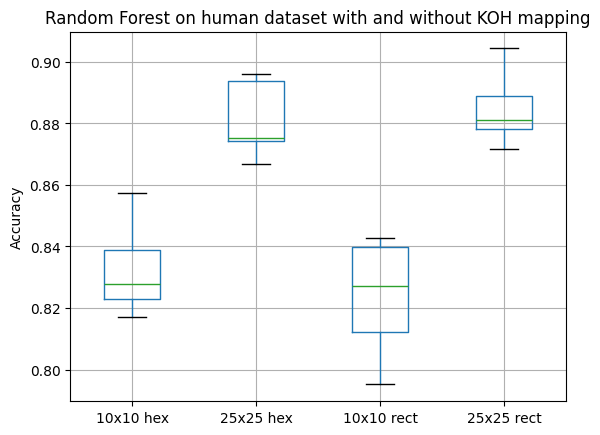

In [12]:
scores.boxplot()
plt.title("Random Forest on human dataset with and without KOH mapping")
plt.ylabel("Accuracy")